# Inaugural Project

Imports and set magics:

In [88]:
# Importing libraries for numerical operations, data manipulation, and visualization
import numpy as np  # For numerical operations like arrays
import pandas as pd  # For structured data operations

# Enabling autoreload in Jupyter to auto-update imported modules on code execution
%load_ext autoreload
%autoreload 2

# Importing matplotlib for plotting and setting default plot aesthetics and font size
import matplotlib.pyplot as plt
plt.rcParams.update({
    "axes.grid": True, "grid.color": "black",
    "grid.alpha": 0.25, "grid.linestyle": "--", 'font.size': 14
})

# Importing a custom module specific to this project
from inauguralproject import ExchangeEconomyClass

# Creating an instance of ExchangeEconomyClass for access to its methods and attributes.
econ = ExchangeEconomyClass()

# Importing optimize from scipy for mathematical optimization tasks
from scipy import optimize


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Question 1

In this question, we examine the allocation of two goods between consumers A and B using an Edgeworth box. It is implemented via the accompanying Python code.

1. **Utility Functions**: We define `utility_A` and `utility_B` for consumers A and B, which capture their preferences for goods $x_1$ and $x_2$.

2. **Initial Endowments**: We assign an initial quantity of each good to both consumers, denoted by `omega_A1`, `omega_A2` for consumer A and `omega_B1`, `omega_B2` for consumer B.

3. **Pareto Improvements**: The code calculates allocations ($x^A_1$, $x^A_2$) that make no consumer worse off than at their initial endowment levels. This involves ensuring that each consumer's utility with the given allocation is at least as high as the utility with their initial endowment.

4. **Edgeworth Box Plot**: Using Matplotlib, we visualize the set of Pareto efficient allocations. Points within the Edgeworth box represent potential distributions of goods between the two consumers that satisfy the Pareto efficiency criterion.



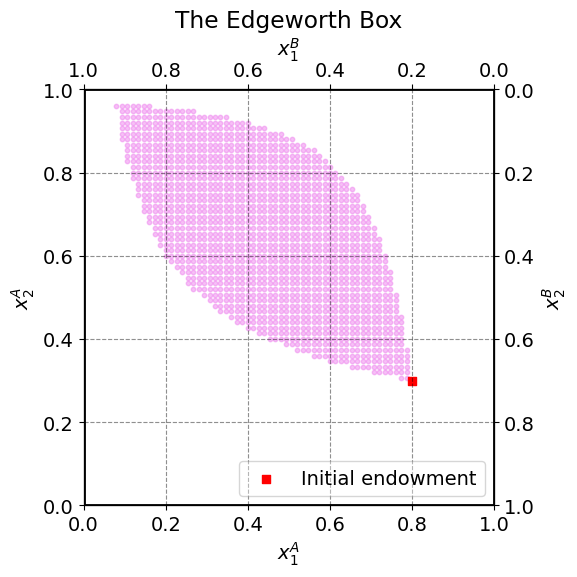

In [92]:
# Set initial endowments and preference parameters for the consumers
omega_A = (0.8, 0.3)
omega_B = (0.2, 0.7)
alpha = 1/3
beta = 2/3

# Create an instance of the ExchangeEconomyClass
econ = ExchangeEconomyClass()

# Compute Pareto improvements based on consumers' endowments and preferences
improvements = econ.pareto_improvements(omega_A[0], omega_A[1], alpha, beta)

# Initialize the plot with specified size and resolution
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax1 = fig.add_subplot(1, 1, 1)

# Label the axes for consumer A's goods
ax1.set_xlabel("$x_1^A$")
ax1.set_ylabel("$x_2^A$")

# Set up twin axes for consumer B's goods
temp = ax1.twinx()
temp.set_ylabel("$x_2^B$")
ax2 = temp.twiny()
ax2.set_xlabel("$x_1^B$")

# Plot the Pareto improvement points
ax1.scatter(improvements[:, 0], improvements[:, 1], s=10, alpha=0.5, color='violet')

# Mark the initial endowment point
ax1.scatter(omega_A[0], omega_A[1], marker="s", color="red", label="Initial endowment")

# Add a title to the plot
plt.title('The Edgeworth Box')

# Turn on the grid for better readability
ax1.grid(True)

# Adjust plot to ensure it fits nicely in the figure area
plt.tight_layout()

# Draw the borders of the Edgeworth box
w1bar, w2bar = 1.0, 1.0  # Total endowments of goods
ax1.plot([0, w1bar], [0, 0], lw=2, color='black')  # Bottom border
ax1.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')  # Top border
ax1.plot([0, 0], [0, w2bar], lw=2, color='black')  # Left border
ax1.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')  # Right border

# Define the limits of the plot area
ax1.set_xlim([0, w1bar])
ax1.set_ylim([0, w2bar])
ax2.set_xlim([w1bar, 0])  # Reversed for B's perspective
ax2.set_ylim([w2bar, 0])  # Reversed for B's perspective

# Include a legend in the plot
ax1.legend(frameon=True, loc='lower right')

# Show the plot
plt.show()


# Question 2

This code calculates and visualizes the market clearing errors for different price vectors in the set \( P_1 \):

1. **Define Price Range**: It first defines the range for \( p_1 \) using the given specifications.

2. **Calculate Errors**: Then, it iterates over each \( p_1 \) in \( P_1 \) and calculates the market clearing errors using the `market_clearing_error` method defined in the `ExchangeEconomyClass`.

3. **Store Errors**: The market clearing errors for each \( p_1 \) are stored in lists.

4. **Plot Errors**: Finally, it plots the market clearing errors \( \epsilon_1 \) and \( \epsilon_2 \) against \( p_1 \). \( \epsilon_1 \) is represented in blue and \( \epsilon_2 \) in red. The plot includes axis labels, a title, a legend, and a grid for better readability.



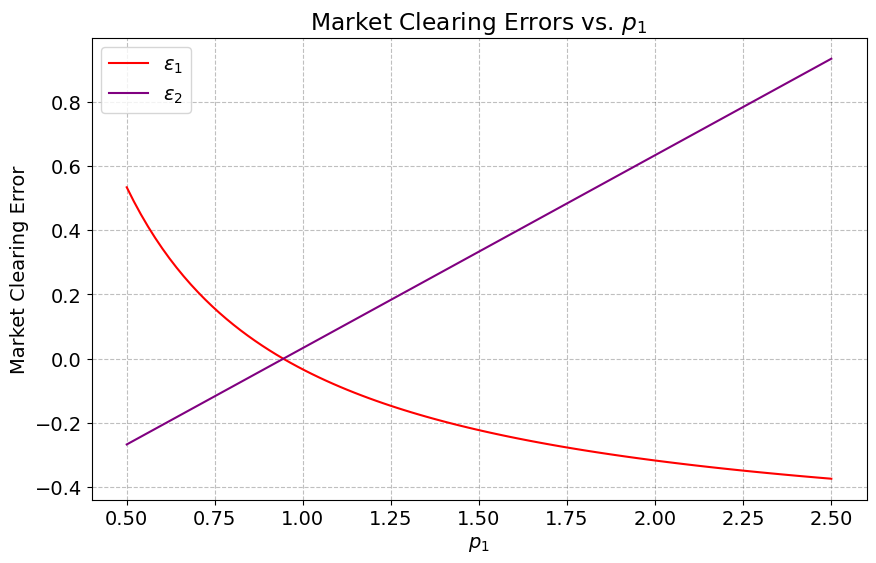

In [97]:
# Define the range for p1
N = 100
P1 = np.linspace(0.5, 2.5, N)

# Initialize lists to store market clearing errors
epsilon1_values = []
epsilon2_values = []

# Calculate market clearing errors for each p1
for p1 in P1:
    # Calculate market clearing error for the current p1
    epsilon1, epsilon2 = econ.market_clearing_error(p1, 1, omega_A, omega_B, alpha, beta)
    
    # Append errors to the lists
    epsilon1_values.append(epsilon1)
    epsilon2_values.append(epsilon2)

# Plot the market clearing errors
plt.figure(figsize=(10, 6))
plt.plot(P1, epsilon1_values, label='$\epsilon_1$', color='red')
plt.plot(P1, epsilon2_values, label='$\epsilon_2$', color='purple')
plt.xlabel('$p_1$')
plt.ylabel('Market Clearing Error')
plt.title('Market Clearing Errors vs. $p_1$')
plt.legend()
plt.grid(True)
plt.show()

# Question 3

In [99]:
# Initialize variables to store market clearing prices
market_clearing_prices = []

# Calculate market clearing errors for each p1
for p1 in P1:
    # Calculate market clearing error for the current p1
    epsilon1, epsilon2 = econ.market_clearing_error(p1, 1, omega_A, omega_B, alpha, beta)
    
    # Check if the errors are close to zero (within a small tolerance)
    if abs(epsilon1) < 0.01 and abs(epsilon2) < 0.01:
        market_clearing_prices.append(p1)

print("Market clearing prices:", market_clearing_prices)

Market clearing prices: [0.9444444444444444]


The market clearing price, as seen by the intersection above, is 0.944.

# Question 4
#  4a


In [105]:
# Define empty variables will be replaced with the found solution.
optimal_price = None
optimal_allocation = None
max_utility = float("-inf")

# Loop over all prices in the price vector 
for p1 in P1:
    # Call demand function for B with necessary arguments
    x1B, x2B = econ.demand_B(p1, 1, omega_B[0], omega_B[1], beta)
    
    # Make sure that the amount of each good left for A is positive
    if 1 - x1B > 0 and 1 - x2B > 0:
        utility_A = econ.utility_A(1 - x1B, 1 - x2B, alpha)
        
        if utility_A > max_utility:
            max_utility = utility_A
            optimal_price = p1
            optimal_allocation = (1 - x1B, 1 - x2B)

# Printing the solution
print(f"The optimal price is {optimal_price:.3f}, and the optimal allocation for A is x1 = {optimal_allocation[0]:.3f} and x2 = {optimal_allocation[1]:.3f}.")
print(f"Resulting in utility {max_utility:.3f} for A.")


The optimal price is 1.894, and the optimal allocation for A is x1 = 0.620 and x2 = 0.640.
Resulting in utility 0.634 for A.


#  4b


ADD CONCISE CONLUSION.